# 10-2. Boston 주택 가격 예측 모델

### 데이터 로드 및 전처리
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 ```keras.datasets```에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis=0)
train_data -= mean



# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
mean = test_data.mean(axis=0)
std = test_data.std(axis=0)
test_data -= mean
test_data /= std

### 모델 구성 및 컴파일
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

### 모델 학습
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
21/21 [==============================] - 1s 10ms/step - loss: 481.4906 - mae: 19.8458 - val_loss: 470.9297 - val_mae: 19.5795
Epoch 2/30
21/21 [==============================] - 0s 4ms/step - loss: 326.9851 - mae: 15.8048 - val_loss: 297.5660 - val_mae: 14.8806
Epoch 3/30
21/21 [==============================] - 0s 3ms/step - loss: 184.3888 - mae: 11.0293 - val_loss: 163.7771 - val_mae: 10.1238
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 93.4046 - mae: 7.4567 - val_loss: 87.7766 - val_mae: 7.2428
Epoch 5/30
21/21 [==============================] - 0s 3ms/step - loss: 56.9034 - mae: 5.4407 - val_loss: 55.6286 - val_mae: 5.6552
Epoch 6/30
21/21 [==============================] - 0s 4ms/step - loss: 41.0578 - mae: 4.5756 - val_loss: 41.2386 - val_mae: 4.8798
Epoch 7/30
21/21 [==============================] - 0s 4ms/step - loss: 32.4964 - mae: 3.9618 - val_loss: 30.5468 - val_mae: 4.3266
Epoch 8/30
21/21 [==============================] - 0s 3ms/step

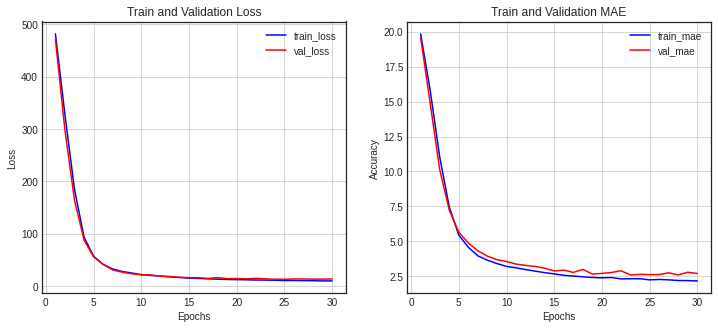

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 21.7568 - mae: 3.1551
